# Robustness Analysis

In this notebook different simulations are run, and the results are extracted for presentation.

The reason for a notebook is that it's easier to do trial and error and saving partial results.

## LOG

#### PRIO1:
- void

#### PRIO2:
- write sequential strategy and refactor accordingly
- experiment with different metrics
- test and comment all classes

#### PRIO3:
- write threatened species strategy
- draw pipeline of program
- rewrite class diagram
- compute the standard deviation from the mean with perturbations (what does it mean?)
- track nodes with size of graph. (save_nodes: bool = False)


#### Done:
- when removing bucket point out probability issue
- store size of graph in metric evolution
- flatten results for averaging them
- write procedure to flatten the metrics for secondary removal 
- compute median of in_degree and use it as default  

## Simulation 1

#### Setup 
- strategy: threatened habitats
- number of perturbations: 100

In [1]:
import sys
sys.path.append('..')

In [2]:
from robustness_analysis.graph import Graph
from robustness_analysis.metaweb import Metaweb, MetawebProcessor
import robustness_analysis.paths as Constants
from robustness_analysis.attack_strategy import ThreatenedHabitats
from robustness_analysis.metaweb import Preparation
from robustness_analysis.simulation import Simulation
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
metaweb_processor = MetawebProcessor(Constants.ALL_SPECIES_AND_FOOD_GROUPS, Constants.SPECIES_FOR_RANDOMIZED_LINKS)
metaweb = Metaweb(Constants.FOODWEB_02, usecols=[Constants.SOURCE_COL, Constants.TARGET_COL])
metaweb.prepare(Preparation.USE_AS_IS, metaweb_processor)
edge_df = metaweb.get_edges()

In [4]:
graph = Graph(edge_df, source=Constants.SOURCE_COL, target=Constants.TARGET_COL)

species_df = pd.read_csv(Constants.ALL_SPECIES_AND_FOOD_GROUPS, usecols=['Taxon', 'Habitat'])

graph.update_attributes(species_df)

# take care of food-groups separately

In [5]:
threatened_habitats = ["Grassland", "Forest"]
attack_strategy = ThreatenedHabitats(threatened_habitats)
attack_strategy.create_buckets(graph)

Buckets after creation: {'0.0': 0.05000000000000002, '0.5': 0.10590613291264053, '0.3333333333333333': 0.08727075527509369, '1.0': 0.16181226582528105, '0.4': 0.09472490633011242, '0.6666666666666666': 0.12454151055018736, '0.2857142857142857': 0.08194636166436602, '0.2222222222222222': 0.07484717018339579, '0.25': 0.07795306645632027, '0.2': 0.07236245316505623, '0.16666666666666666': 0.06863537763754686}
Buckets set in graph: {'0.0': 0.05000000000000002, '0.5': 0.10590613291264053, '0.3333333333333333': 0.08727075527509369, '1.0': 0.16181226582528105, '0.4': 0.09472490633011242, '0.6666666666666666': 0.12454151055018736, '0.2857142857142857': 0.08194636166436602, '0.2222222222222222': 0.07484717018339579, '0.25': 0.07795306645632027, '0.2': 0.07236245316505623, '0.16666666666666666': 0.06863537763754686}


In [6]:
simulation = Simulation(graph, 10)
simulation.run()

No nodes found for bucket 0.16666666666666666. Removing bucket.
No nodes found for bucket 0.16666666666666666. Removing bucket.
No nodes found for bucket 0.16666666666666666. Removing bucket.
No nodes found for bucket 0.16666666666666666. Removing bucket.
No nodes found for bucket 0.16666666666666666. Removing bucket.
No nodes found for bucket 0.16666666666666666. Removing bucket.
No nodes found for bucket 0.16666666666666666. Removing bucket.
No nodes found for bucket 0.16666666666666666. Removing bucket.
No nodes found for bucket 0.16666666666666666. Removing bucket.
No nodes found for bucket 0.16666666666666666. Removing bucket.
Id: 0.8472 , Size: 21000
Id: 0.0838 , Size: 21000
Id: 0.2912 , Size: 21000
Id: 0.0529 , Size: 21000
Id: 0.3024 , Size: 21000
Id: 0.696 , Size: 21000
Id: 0.1417 , Size: 21000
Id: 0.3434 , Size: 21000
Id: 0.0529 , Size: 20000
Id: 0.8472 , Size: 20000
Id: 0.0838 , Size: 20000
Id: 0.1643 , Size: 20000
Id: 0.3024 , Size: 20000
Id: 0.1417 , Size: 20000
Id: 0.696 ,

In [ ]:
results = simulation.get_results()
print(results)

{'graph_size': [21272.0, 21270.8, 21269.7, 21264.7, 21263.6, 21260.0, 21259.0, 21258.0, 21256.8, 21255.8, 21254.8, 21253.8, 21252.7, 21251.7, 21250.7, 21249.6, 21248.2, 21247.2, 21246.2, 21245.2, 21244.2, 21243.2, 21242.2, 21240.5, 21239.4, 21238.4, 21237.4, 21236.2, 21235.1, 21233.6, 21232.1, 21231.1, 21229.8, 21228.8, 21227.8, 21226.8, 21225.3, 21224.3, 21223.3, 21221.5, 21219.6, 21218.5, 21217.5, 21215.9, 21214.9, 21213.7, 21212.7, 21211.4, 21210.4, 21209.4, 21208.4, 21207.4, 21206.0, 21204.9, 21203.9, 21202.8, 21201.7, 21200.7, 21199.7, 21196.1, 21195.1, 21193.5, 21192.2, 21191.2, 21190.2, 21189.0, 21188.0, 21187.0, 21185.7, 21184.5, 21183.5, 21181.7, 21180.7, 21179.7, 21178.6, 21177.5, 21176.3, 21175.1, 21174.1, 21173.1, 21172.1, 21171.0, 21170.0, 21168.7, 21167.7, 21166.5, 21165.5, 21164.4, 21162.6, 21161.6, 21160.6, 21159.6, 21158.3, 21156.6, 21155.6, 21154.5, 21153.5, 21105.0, 21104.0, 21103.0, 21101.7, 21100.7, 21099.7, 21098.7, 21097.5, 21095.9, 21094.8, 21093.7, 21092.6, 210

[[0.267004 0.004874 0.329415 1.      ]
 [0.127568 0.566949 0.550556 1.      ]
 [0.993248 0.906157 0.143936 1.      ]]


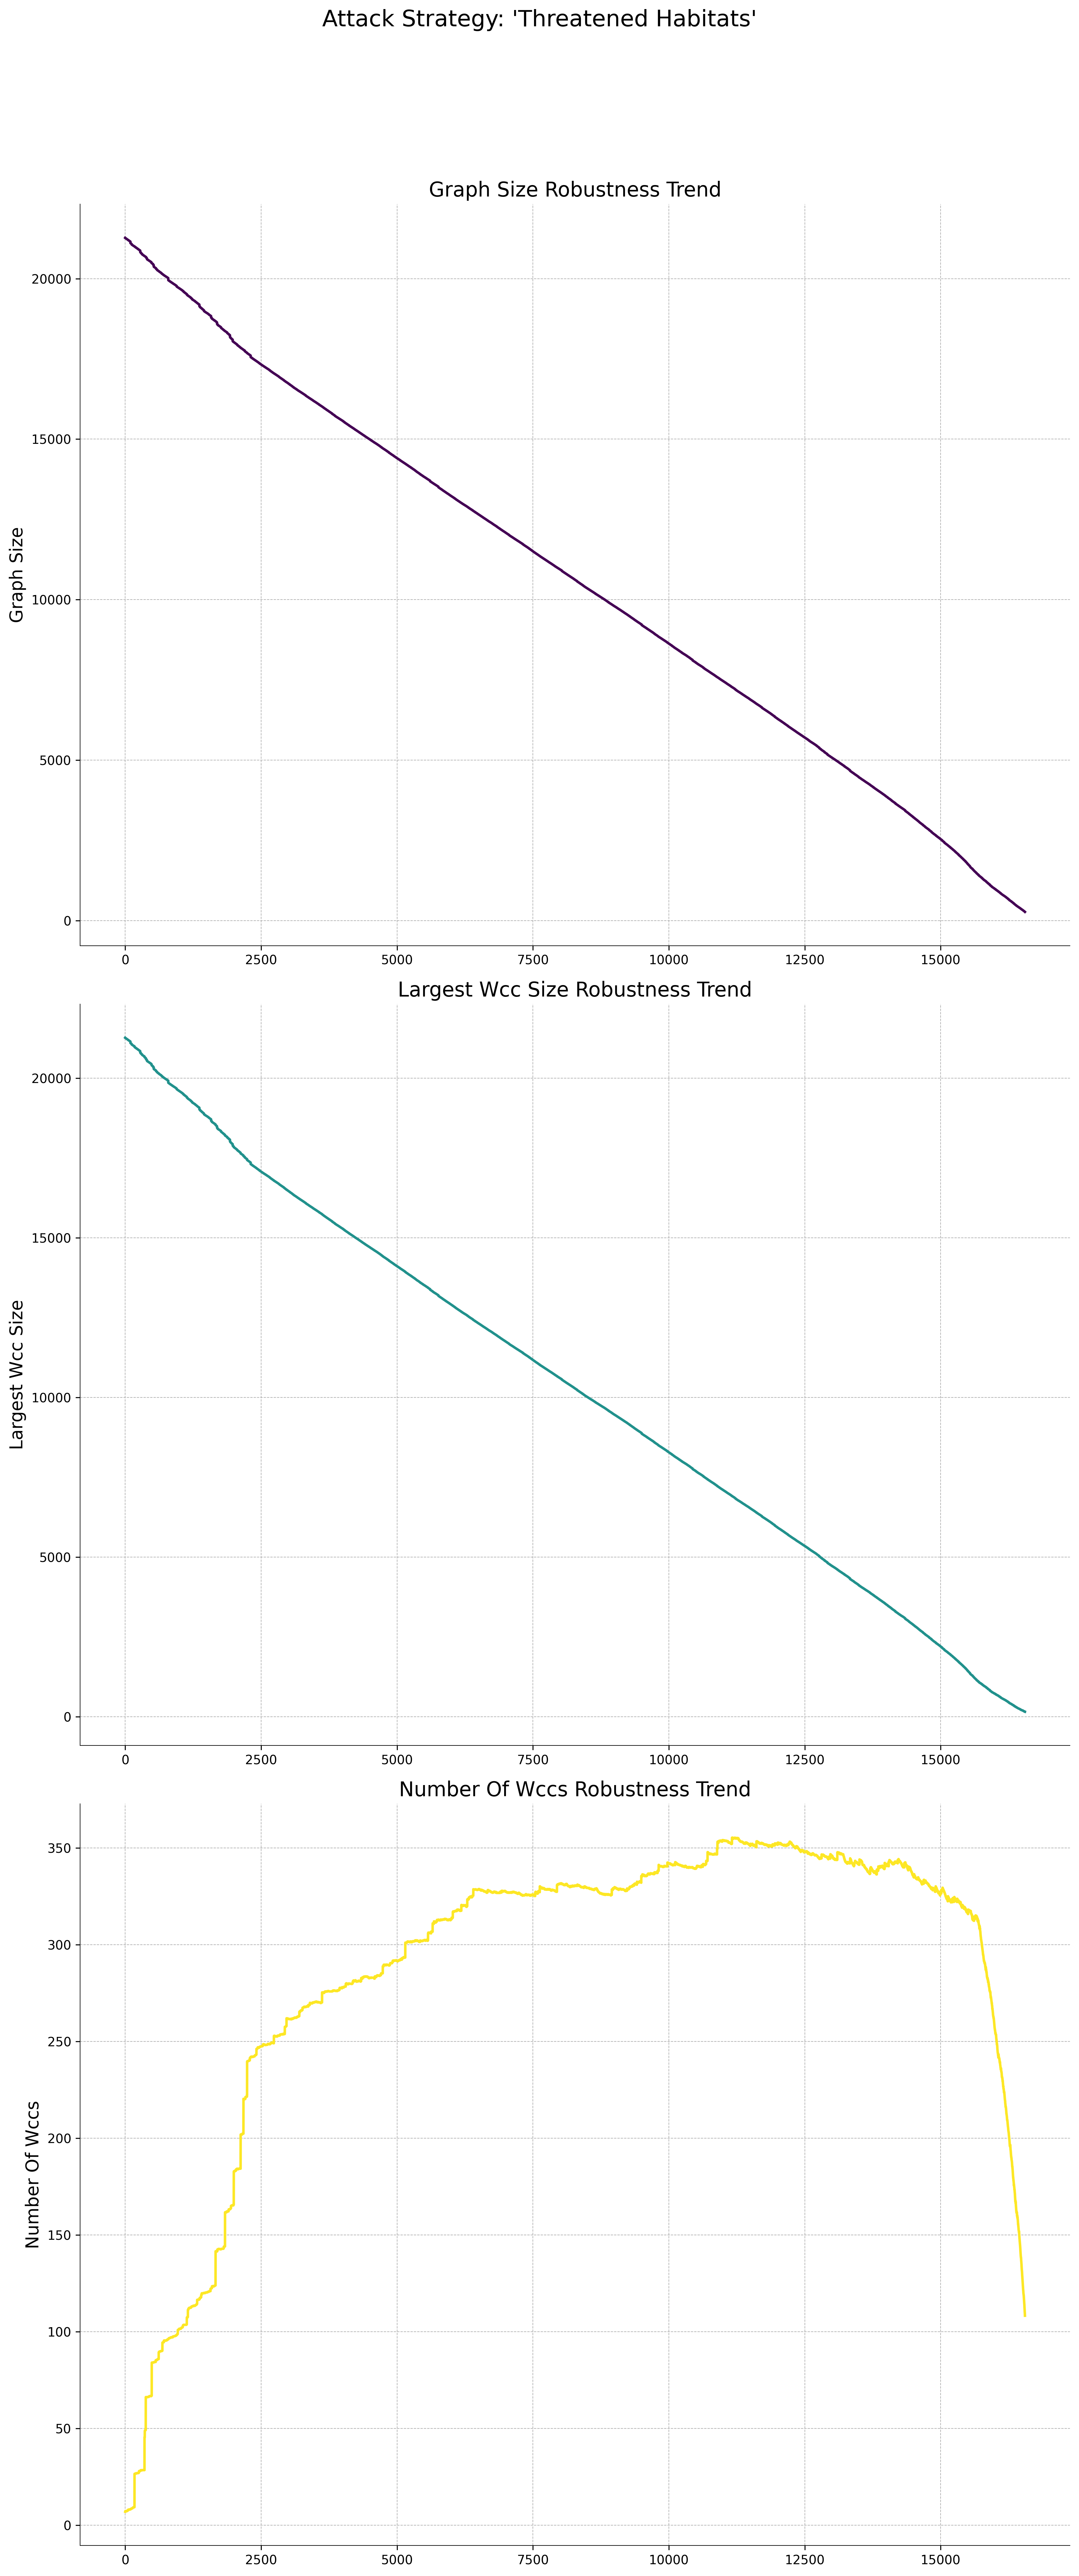

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

metric_names = list(results.keys())
colors = plt.cm.viridis(np.linspace(0, 1, len(metric_names)))

print(colors)

num_rows = len(metric_names)

fig = plt.figure(figsize=(12, 9 * num_rows), dpi=300) 

for i, metric_name in enumerate(metric_names):
    ax = fig.add_subplot(num_rows, 1, i+1)  
    ax.plot(results[metric_name], color=colors[i], linestyle='-', linewidth=2)
    
    ax.set_ylabel(metric_name.replace("_", " ").title(), fontsize=14)
    ax.set_title(f'{metric_name.replace("_", " ").title()} Robustness Trend', fontsize=16)
    
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_linewidth(0.5)
    ax.spines['left'].set_linewidth(0.5)

fig.suptitle('Attack Strategy: \'Threatened Habitats\'', fontsize=18, y=1.05)
plt.tight_layout()

plt.show()